In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

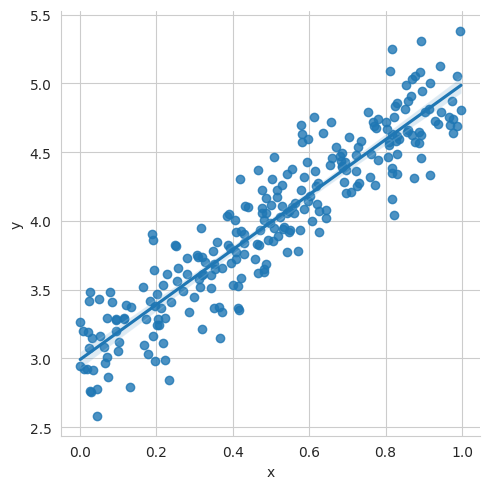

In [ ]:
m = 2     # Slop
c = 3     # Intercept
x = np.random.rand(256)

noise = np.random.randn(256)/4
y = m*x + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x = 'x', y = 'y', data = df)

In [ ]:
# Linear regression with pytorch

import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# y = mx+c
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y = torch.tensor([[5.0], [6.0], [7.0], [8.0]])

In [ ]:
# model
model = nn.Linear(in_features=1, out_features=1)

In [ ]:
# loss and optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
# Training loop
for epoch in range(1000):
  # forward pass
  y_pred = model(x)

  # loss
  loss = criterion(y_pred, y)
  optimizer.zero_grad()

  # backward pass
  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 3.6061134338378906
Epoch: 100, Loss: 0.958188533782959
Epoch: 200, Loss: 0.5260342359542847
Epoch: 300, Loss: 0.2887862026691437
Epoch: 400, Loss: 0.15854014456272125
Epoch: 500, Loss: 0.0870368480682373
Epoch: 600, Loss: 0.047782108187675476
Epoch: 700, Loss: 0.02623164653778076
Epoch: 800, Loss: 0.014400887303054333
Epoch: 900, Loss: 0.00790595542639494


In [ ]:
# final
print(f"Final weight: {model.weight.item()}, Final Bias: {model.bias.item()}")

Final weight: 1.0548301935195923, Final Bias: 3.8387928009033203


In [ ]:
# Linear Regression --> pytorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

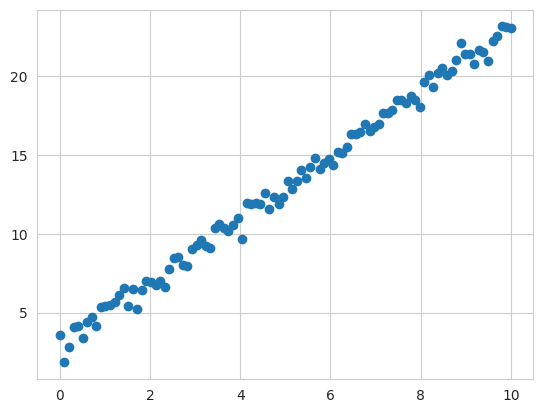

In [ ]:
# x_train = x.reshape(-1, 1).type(torch.float32)
# y_train = y.reshape(-1, 1).type(torch.float32)

# Generate data
x= torch.linspace(0, 10, 100).view(-1, 1)     # shape (100, 1)
y = 2 * x + 3 + torch.randn(x.size()) * 0.5   # shape (100, 1)

plt.scatter(x.numpy(), y.numpy())
plt.show()

In [ ]:
# class
class LinearRegression_vj(nn.Module):
    # def __init__(self, input_size, output_size):
    # super(LinearRegression_vj, self).__init__()
    # self.linear = nn.Linear(input_size, output_size)

  def __init__(self):
    super(LinearRegression_vj, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
# input_size = x_train.shape[1]
# output_size = y_train.shape[1]
# input_size, output_size(1, 1)
model = LinearRegression_vj()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)
# [w, b] = model.parameters()

In [ ]:
# def get_param_value():
#   return w.data[0][0], b.data[0]

In [ ]:
# Training loop
for epoch in range(500):
  # forward pass
  y_pred = model(x)

  # loss
  loss = criterion(y_pred, y)
  optimizer.zero_grad()

  # backward pass
  loss.backward()
  optimizer.step()
  if epoch % 50 == 0:
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 311.6054992675781
Epoch: 50, Loss: 1.6599634885787964
Epoch: 100, Loss: 1.1040529012680054
Epoch: 150, Loss: 0.7660778164863586
Epoch: 200, Loss: 0.5605998635292053
Epoch: 250, Loss: 0.4356760084629059
Epoch: 300, Loss: 0.3597263991832733
Epoch: 350, Loss: 0.31355151534080505
Epoch: 400, Loss: 0.28547877073287964
Epoch: 450, Loss: 0.26841142773628235


In [ ]:
# def plot_current_fit(title = ''):
#   plt.figure(figsize=(12,4))
#   plt.title(title)
#   plt.scatter(x, y, s = 8)
#   w1 = w.data[0][0]
#   b1 = b.data[0]
#   x1 = np.array([0,1])
#   y1 = w1*x1 + b1
#   plt.plot(x1, y1, 'r')
#   plt.xlabel("x(input)")
#   plt.ylabel("y(output)")

#   plt.legend()
#   plt.show()

# plot_current_fit("Linear Regression")

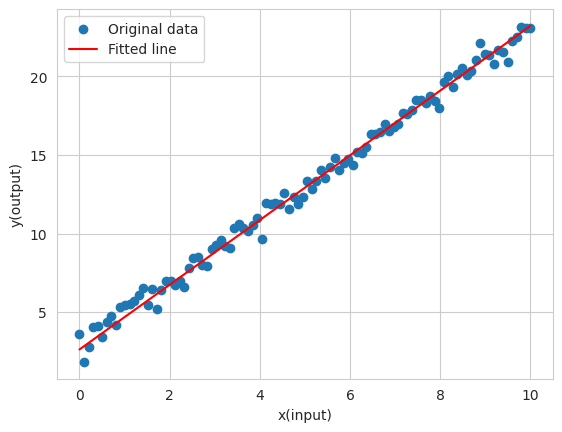

In [ ]:
predicted = model(x).detach()
plt.scatter(x.numpy(), y.numpy(), label = 'Original data')
plt.plot(x.numpy(), predicted.numpy(), 'r', label = 'Fitted line')
plt.xlabel("x(input)")
plt.ylabel("y(output)")
plt.legend()
plt.show()

In [ ]:
# Logistic with pytorch

X= torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
Y = torch.tensor([[0.0], [0.0], [0.0], [1.0], [1.0]])

In [ ]:
# model
model_log = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())

In [ ]:
# loss and optim
criterion = nn.BCELoss() # Binory cross entropy
optimizer = optim.SGD(model_log.parameters(), lr = 0.01)

In [ ]:
# train loop
for epoch in range(500):
  # Forward pass
  y_pred = model_log(X)

  # loss
  loss = criterion(y_pred, Y)
  optimizer.zero_grad()

  #backward pass
  loss.backward()

  optimizer.step()
  if epoch % 50 == 0:
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 0.5992118120193481
Epoch: 50, Loss: 0.5872856974601746
Epoch: 100, Loss: 0.5758382081985474
Epoch: 150, Loss: 0.5648475885391235
Epoch: 200, Loss: 0.5542920827865601
Epoch: 250, Loss: 0.5441516041755676
Epoch: 300, Loss: 0.5344061851501465
Epoch: 350, Loss: 0.5250370502471924
Epoch: 400, Loss: 0.5160265564918518
Epoch: 450, Loss: 0.5073570013046265


In [ ]:
test = torch.tensor([[3.5]])
with torch.no_grad():
  y_pred = model_log(test)
  print("probability of paasing: ", y_pred.item())
  print("class prediction:", 1 if y_pred.item() > 0.5 else 0)
  # print(y_pred)

probability of paasing:  0.5758769512176514
class prediction: 1
